In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df = pd.read_csv("../data/d02_intermediate/us_baby_names.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Year    int64 
 1   Name    object
 2   Gender  object
 3   Count   int64 
dtypes: int64(2), object(2)
memory usage: 59.7+ MB


In [5]:
df.nunique()

Year        139
Name      98400
Gender        2
Count     13720
dtype: int64

In [6]:
df.Gender = df.Gender.astype("category")

In [7]:
names_2018 = df[df.Year == 2018].copy()
names_2018

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


In [8]:
names_2018[names_2018.Gender == 'F'].nlargest(10, "Count")

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
1925018,2018,Charlotte,F,12940
1925019,2018,Mia,F,12642
1925020,2018,Amelia,F,12301
1925021,2018,Harper,F,10582
1925022,2018,Evelyn,F,10376


In [9]:
def most_pop(year, gender, n):
    return df[(df.Year == year) & (df.Gender == gender)].nlargest(n, "Count")

In [10]:
most_pop(2018, "F", 10)

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
1925018,2018,Charlotte,F,12940
1925019,2018,Mia,F,12642
1925020,2018,Amelia,F,12301
1925021,2018,Harper,F,10582
1925022,2018,Evelyn,F,10376


In [11]:
most_pop(2018, "M", 10)

,Year,Name,Gender,Count
1943042,2018,Liam,M,19837
1943043,2018,Noah,M,18267
1943044,2018,William,M,14516
1943045,2018,James,M,13525
1943046,2018,Oliver,M,13389
1943047,2018,Benjamin,M,13381
1943048,2018,Elijah,M,12886
1943049,2018,Lucas,M,12585
1943050,2018,Mason,M,12435
1943051,2018,Logan,M,12352


In [16]:
f_1880 = most_pop(1880, "F", 20)
f_1880

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
5,1880,Margaret,F,1578
6,1880,Ida,F,1472
7,1880,Alice,F,1414
8,1880,Bertha,F,1320
9,1880,Sarah,F,1288


In [19]:
f_2018 = most_pop(2018, "F", 20)
f_2018

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
1925018,2018,Charlotte,F,12940
1925019,2018,Mia,F,12642
1925020,2018,Amelia,F,12301
1925021,2018,Harper,F,10582
1925022,2018,Evelyn,F,10376


In [20]:
f_evergreen = f_2018[["Name", "Count"]].merge(f_1880[["Name", "Count"]], how="inner", on="Name", suffixes=["_2018", "_1880"])
f_evergreen

,Name,Count_2018,Count_1880
0,Emma,18688,2003
1,Elizabeth,8513,1939
2,Ella,8055,1156


In [21]:
m_1880 = most_pop(1880, "M", 20)
m_1880

,Year,Name,Gender,Count
942,1880,John,M,9655
943,1880,William,M,9532
944,1880,James,M,5927
945,1880,Charles,M,5348
946,1880,George,M,5126
947,1880,Frank,M,3242
948,1880,Joseph,M,2632
949,1880,Thomas,M,2534
950,1880,Henry,M,2444
951,1880,Robert,M,2415


In [22]:
m_2018 = most_pop(2018, "M", 20)
m_2018

,Year,Name,Gender,Count
1943042,2018,Liam,M,19837
1943043,2018,Noah,M,18267
1943044,2018,William,M,14516
1943045,2018,James,M,13525
1943046,2018,Oliver,M,13389
1943047,2018,Benjamin,M,13381
1943048,2018,Elijah,M,12886
1943049,2018,Lucas,M,12585
1943050,2018,Mason,M,12435
1943051,2018,Logan,M,12352


In [23]:
m_evergreen = m_2018[["Name", "Count"]].merge(m_1880[["Name", "Count"]], how="inner", on="Name", suffixes=["_2018", "_1880"])
m_evergreen

,Name,Count_2018,Count_1880
0,William,14516,9532
1,James,13525,5927
2,Henry,10649,2444


In [25]:
agg= df.groupby(["Name", "Gender"]).agg(Total = ("Count", "sum"), No_Year = ("Count", "count"), First_Year=("Year", "min"), Last_Year=("Year", "max"), Max_Count = ("Count", "max"))

C:\Users\vinic\AppData\Local\Temp\ipykernel_13548\1399693819.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg= df.groupby(["Name", "Gender"]).agg(Total = ("Count", "sum"), No_Year = ("Count", "count"), First_Year=("Year", "min"), Last_Year=("Year", "max"), Max_Count = ("Count", "max"))


In [26]:
agg

Total  No_Year  First_Year  Last_Year  Max_Count
Name    Gender                                                  
Aaban   F           0        0         NaN        NaN        NaN
        M         114       11     2007.00    2018.00      16.00
Aabha   F          35        5     2011.00    2016.00       9.00
        M           0        0         NaN        NaN        NaN
Aabid   F           0        0         NaN        NaN        NaN
...               ...      ...         ...        ...        ...
Zyyanna M           0        0         NaN        NaN        NaN
Zyyon   F           0        0         NaN        NaN        NaN
        M           6        1     2014.00    2014.00       6.00
Zzyzx   F           0        0         NaN        NaN        NaN
        M          10        2     2010.00    2018.00       5.00

[196800 rows x 5 columns]

In [30]:
def best_year(group):
    return group.nlargest(1, "Count").Year

In [36]:
best_y = df.groupby(["Name", "Gender"]).apply(best_year)

C:\Users\vinic\AppData\Local\Temp\ipykernel_13548\367871197.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  best_y = df.groupby(["Name", "Gender"]).apply(best_year)


KeyboardInterrupt: 

In [ ]:
best_y

In [ ]:
best_y.droplevel(-1)

In [32]:
agg["Best_Year"] = best_y.droplevel(-1)

NameError: name 'best_y' is not defined

In [33]:
agg.reset_index(inplace=True)

In [34]:
agg

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count
0,Aaban,F,0,0,NaN,NaN,NaN
1,Aaban,M,114,11,2007.00,2018.00,16.00
2,Aabha,F,35,5,2011.00,2016.00,9.00
3,Aabha,M,0,0,NaN,NaN,NaN
4,Aabid,F,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
196795,Zyyanna,M,0,0,NaN,NaN,NaN
196796,Zyyon,F,0,0,NaN,NaN,NaN
196797,Zyyon,M,6,1,2014.00,2014.00,6.00
196798,Zzyzx,F,0,0,NaN,NaN,NaN


In [35]:
agg[(agg.Name == "Mary") & (agg.Gender == 'F')]

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count
123434,Mary,F,4125675,139,1880.00,2018.00,73985.00


In [37]:
agg.groupby("Gender").apply(lambda x: x.nlargest(10, "Total"))

C:\Users\vinic\AppData\Local\Temp\ipykernel_13548\3790669141.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg.groupby("Gender").apply(lambda x: x.nlargest(10, "Total"))
C:\Users\vinic\AppData\Local\Temp\ipykernel_13548\3790669141.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  agg.groupby("Gender").apply(lambda x: x.nlargest(10, "Total"))


Name Gender    Total  No_Year  First_Year  Last_Year  \
Gender                                                                     
F      123434       Mary      F  4125675      139     1880.00    2018.00   
       55100   Elizabeth      F  1638349      139     1880.00    2018.00   
       142434   Patricia      F  1572016      135     1884.00    2018.00   
       83680    Jennifer      F  1467207      101     1916.00    2018.00   
       113152      Linda      F  1452668      139     1880.00    2018.00   
       21348     Barbara      F  1434397      139     1880.00    2018.00   
       121050   Margaret      F  1248985      139     1880.00    2018.00   
       170120      Susan      F  1121703      139     1880.00    2018.00   
       51256     Dorothy      F  1107635      139     1880.00    2018.00   
       157344      Sarah      F  1077746      139     1880.00    2018.00   
M      78267       James      M  5164280      139     1880.00    2018.00   
       86969        John      M  5124817      139     1880.00    2018.00   
       151747     Robert      M  4820129      139     1880.00    2018.00   
       127667    Michael      M  4362731      139     1880.00    2018.00   
       188363    William      M  4117369      139     1880.00    2018.00   
       43431       David      M  3621322      139     1880.00    2018.00   
       88407      Joseph      M  2613304      139     1880.00    2018.00   
       150755    Richard      M  2565301      139     1880.00    2018.00   
       32931     Charles      M  2392779      139     1880.00    2018.00   
       177369     Thomas      M  2311849      139     1880.00    2018.00   

               Max_Count  
Gender                    
F      123434   73985.00  
       55100    20744.00  
       142434   56442.00  
       83680    63603.00  
       113152   99689.00  
       21348    48792.00  
       121050   28467.00  
       170120   47402.00  
       51256    39999.00  
       157344   28484.00  
M      78267    94757.00  
       86969    88319.00  
       151747   91640.00  
       127667   92704.00  
       188363   66989.00  
       43431    86253.00  
       88407    32732.00  
       150755   58868.00  
       32931    40770.00  
       177369   48652.00

In [38]:
all_times = agg.groupby("Gender").apply(lambda x: x.nlargest(10, "Total")).reset_index(drop=True)
all_times

C:\Users\vinic\AppData\Local\Temp\ipykernel_13548\2095451463.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_times = agg.groupby("Gender").apply(lambda x: x.nlargest(10, "Total")).reset_index(drop=True)
C:\Users\vinic\AppData\Local\Temp\ipykernel_13548\2095451463.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  all_times = agg.groupby("Gender").apply(lambda x: x.nlargest(10, "Total")).reset_index(drop=True)


,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count
0,Mary,F,4125675,139,1880.00,2018.00,73985.00
1,Elizabeth,F,1638349,139,1880.00,2018.00,20744.00
2,Patricia,F,1572016,135,1884.00,2018.00,56442.00
3,Jennifer,F,1467207,101,1916.00,2018.00,63603.00
4,Linda,F,1452668,139,1880.00,2018.00,99689.00
5,Barbara,F,1434397,139,1880.00,2018.00,48792.00
6,Margaret,F,1248985,139,1880.00,2018.00,28467.00
7,Susan,F,1121703,139,1880.00,2018.00,47402.00
8,Dorothy,F,1107635,139,1880.00,2018.00,39999.00
9,Sarah,F,1077746,139,1880.00,2018.00,28484.00


In [39]:
import seaborn as sns

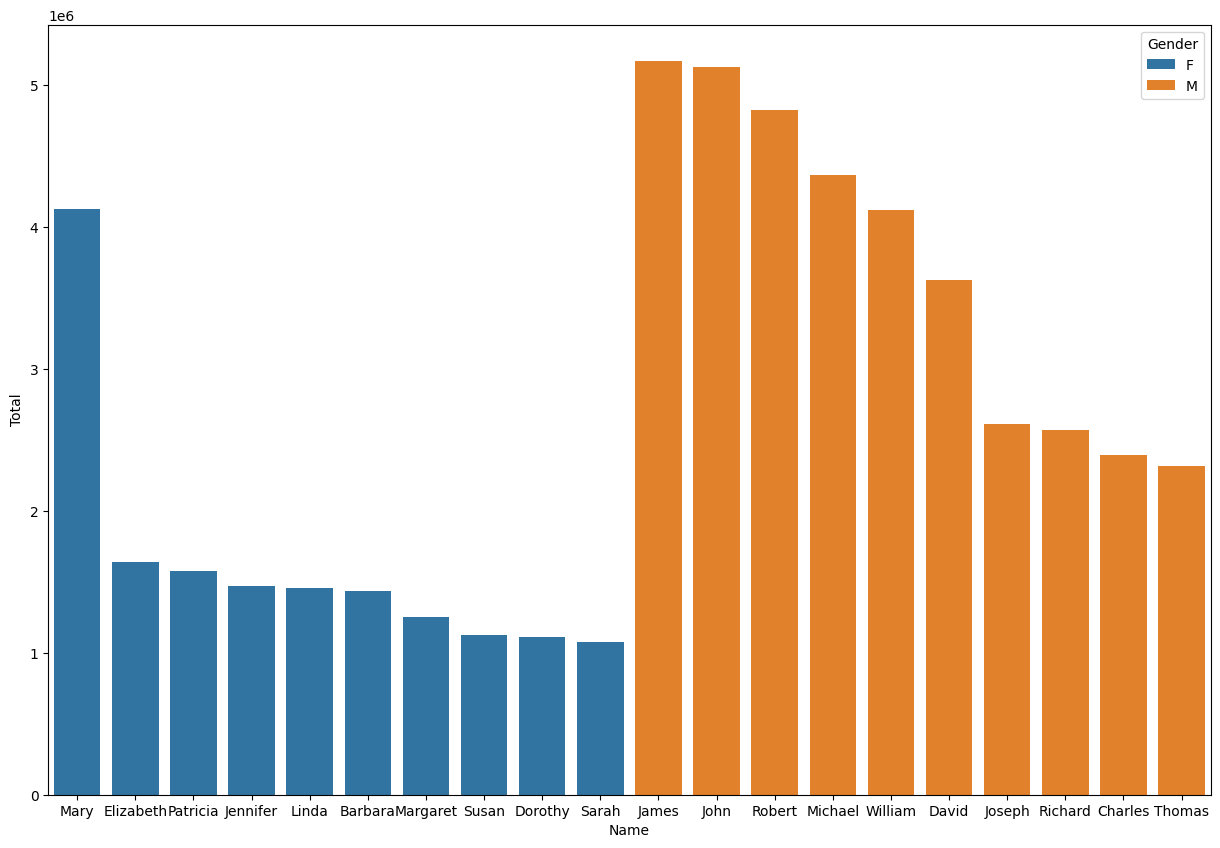

In [40]:
plt.figure(figsize=(15,10))
sns.barplot(x="Name", y="Total", data=all_times, hue="Gender")
plt.show()

In [41]:
babies_per_year = df.groupby("Year").Count.sum()

In [42]:
babies_per_year

Year
1880     201484
1881     192696
1882     221533
1883     216944
1884     243461
         ...   
2014    3698914
2015    3691990
2016    3657797
2017    3561975
2018    3487353
Name: Count, Length: 139, dtype: int64

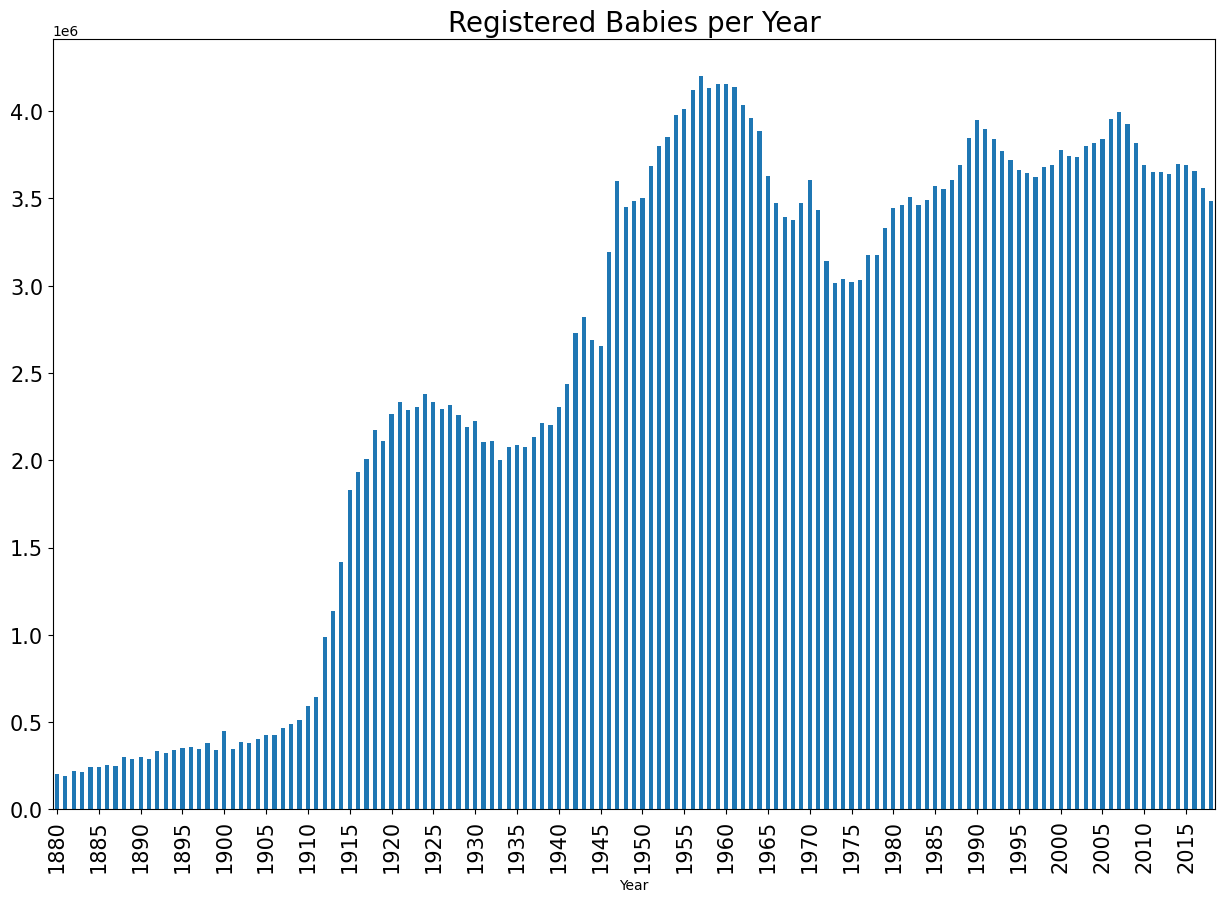

In [43]:
babies_per_year.plot(kind="bar", y="Count", figsize=(15,10), fontsize=15)
plt.xticks(ticks=(range(0, len(babies_per_year), 5)), labels= range(1880, 2019, 5))
plt.title("Registered Babies per Year", fontsize=20)
plt.show()

In [44]:
diff_names = df.groupby("Year").Name.count()
diff_names

Year
1880     2000
1881     1935
1882     2127
1883     2084
1884     2297
        ...  
2014    33243
2015    33121
2016    33010
2017    32590
2018    32033
Name: Name, Length: 139, dtype: int64

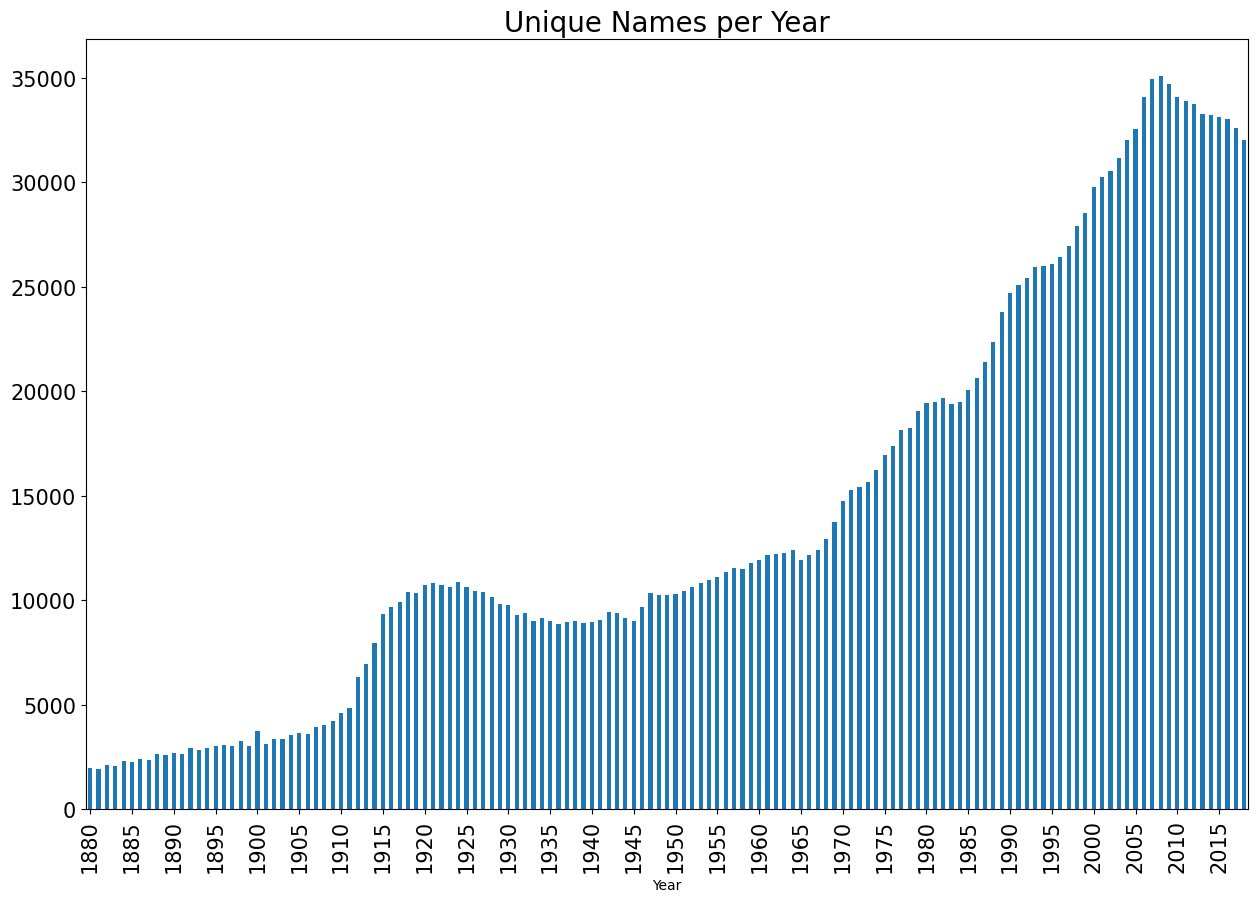

In [45]:
diff_names.plot(kind="bar", figsize=(15,10), fontsize=15)
plt.xticks(ticks=(range(0, len(diff_names), 5)), labels= range(1880, 2019, 5))
plt.title("Unique Names per Year", fontsize=20)
plt.show()